In [63]:
import pandas as pd
import matplotlib.pyplot as plt
basketball = pd.read_csv('https://raw.githubusercontent.com/evapanizo/IronHack-Data-Module-2/master/27.-Network-Analysis/data/us_mens_basketball.csv', sep=',')

In [14]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [15]:
import networkx as nx
import community
import pandas as pd

# 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

In [16]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [25]:
def df_to_graph(df, entity, edge):
    ''' Transform a dataframe into another dataframe suitable to work with graphs.'''
    graph_df = pd.merge(df, df, how='inner', on=edge)
    graph_df = graph_df.groupby([f'{entity}_x', f'{entity}_y']).count().reset_index()
    graph_df = graph_df.query(f'{entity}_x != {entity}_y')

    if type(edge) == list:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df.loc[:, [entity + '_x', entity + '_y', edge]]
    
    return graph_df.rename(columns={f'{entity}_x':f'{entity}_src', 
                                    f'{entity}_y':f'{entity}_dest'})

data = df_to_graph(basketball, 'Name', 'Games')

In [27]:
data

,Name_src,Name_dest,Games
1,Adrian Delano Dantley,"Ernest ""Ernie"" Grunfeld",1
2,Adrian Delano Dantley,"Kenneth Alan ""Kenny"" Carr",1
3,Adrian Delano Dantley,"Michel Taylor ""Tate"" Armstrong",1
4,Adrian Delano Dantley,"Mitchell William ""Mitch"" Kupchak",1
5,Adrian Delano Dantley,"Philip Jackson ""Phil"" Ford, Jr.",1
...,...,...,...
2654,"Wilmer Frederick ""Bill"" Hosket",John Richard Clawson,1
2655,"Wilmer Frederick ""Bill"" Hosket","Joseph Henry ""Jo-Jo"" White",1
2656,"Wilmer Frederick ""Bill"" Hosket","Michael Barnwell ""Mike"" Silliman",1
2657,"Wilmer Frederick ""Bill"" Hosket","Michael Thomas ""Mike"" Barrett",1


# 2. Use the from_pandas_edgelist method to turn the data frame into a graph.

In [31]:
G = nx.from_pandas_edgelist(data, 'Name_src', 'Name_dest', edge_attr='Games')

# 3. Compute and print the following graph statistics for the graph:¶


* Number of nodes
* Number of edges
* Average degree
* Density

In [36]:
print('Number of nodes:', G.order())
print('Number of edges:', G.size())
print('Average degree:', sum(dict(G.degree()).values())/G.order())
print('Density:', nx.density(G))

Number of nodes: 196
Number of edges: 1232
Average degree: 12.571428571428571
Density: 0.06446886446886448


# 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [41]:
betweenness = nx.betweenness_centrality(G)

betweenness
betweenness = pd.DataFrame.from_dict(betweenness, orient='index').reset_index()
betweenness.columns = ['Node', 'Betweenness Centrality']
betweenness.sort_values('Betweenness Centrality', ascending=False).head()

,Node,Betweenness Centrality
41,Gary Dwayne Payton,0.091938
42,Jason Frederick Kidd,0.091356
53,Carmelo Kyan Anthony,0.047423
86,David Maurice Robinson,0.032662
119,"William Marion ""Bill"" Hougland",0.030241


# 5. Compute PageRank centrality for the graph and print the top 5 nodes with the highest centrality.

In [42]:
pagerank = nx.pagerank(G)

pagerank = pd.DataFrame.from_dict(pagerank, orient='index').reset_index()
pagerank.columns = ['Node', 'PageRank Centrality']
pagerank.sort_values('PageRank Centrality', ascending=False).head()

,Node,PageRank Centrality
53,Carmelo Kyan Anthony,0.012578
86,David Maurice Robinson,0.009965
33,"Robert Albert ""Bob"" Kurland",0.009114
57,LeBron Raymone James,0.009085
119,"William Marion ""Bill"" Hougland",0.008851


# 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.¶


In [54]:
ego = nx.ego_graph(G, 'Carmelo Kyan Anthony')


sorted(nx.degree_centrality(ego).items(), key=lambda x : x[1], reverse=True)

[('Carmelo Kyan Anthony', 1.0),
 ('LeBron Raymone James', 0.7222222222222222),
 ('Kevin Wayne Durant', 0.5833333333333333),
 ('Carlos Austin Boozer, Jr.', 0.5277777777777778),
 ('Dwyane Tyrone Wade, Jr.', 0.5277777777777778),
 ('Deron Michael Williams', 0.5),
 ('Kobe Bean Bryant', 0.5),
 ('Christopher Emmanuel "Chris" Paul', 0.5),
 ('Allen Ezail Iverson', 0.3055555555555555),
 ('Richard Allen Jefferson', 0.3055555555555555),
 ('Jimmy Butler III', 0.3055555555555555),
 ('Russell Westbrook, Jr.', 0.3055555555555555),
 ('Tyson Cleotis Chandler', 0.3055555555555555),
 ('Draymond Jamal Green', 0.3055555555555555),
 ("Amar'e Carsares Stoudemire", 0.3055555555555555),
 ('Stephon Xavier Marbury', 0.3055555555555555),
 ('Andre Tyler Iguodala', 0.3055555555555555),
 ('Shawn Dwayne Marion', 0.3055555555555555),
 ('DeMar Darnell DeRozan', 0.3055555555555555),
 ('Kyle Lowry', 0.3055555555555555),
 ('Kyrie Andrew Irving', 0.3055555555555555),
 ('Hyland DeAndre Jordan, Jr.', 0.3055555555555555),
 ('T

# 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

Look for nx.draw_kamada_kawai for reference. 


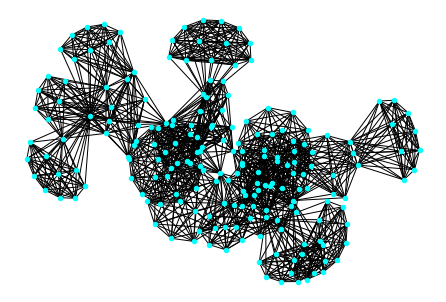

In [53]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')

# 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

nx.ego_graph will help you visualize a graph centered at some node.

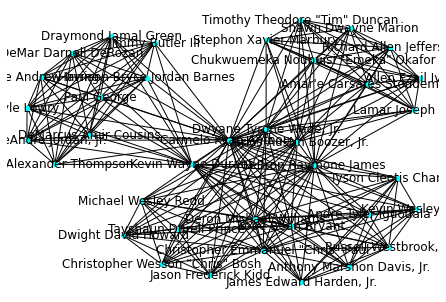

In [55]:
nx.draw_kamada_kawai(ego, node_size=20, node_color='cyan', with_labels=True)

# 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.


In [69]:
communities = nx.community.girvan_newman(G)
community = next(communities)
community

({'Adrian Delano Dantley',
  'Ernest "Ernie" Grunfeld',
  'Kenneth Alan "Kenny" Carr',
  'Michel Taylor "Tate" Armstrong',
  'Mitchell William "Mitch" Kupchak',
  'Philip Jackson "Phil" Ford, Jr.',
  'Phillip Gregory "Phil" Hubbard',
  'Scott Glenn May',
  'Steven Bernard "Steve" Sheppard',
  'Thomas Joseph "Tom" LaGarde',
  'Walter Paul Davis',
  'William Quinn Buckner'},
 {'Adrian Howard Smith',
  'Alexander John "Alex" Groza',
  'Burdette Eliele "Burdie" Haldorson',
  'Carl Cecil Cain',
  'Charles Frick "Chuck" Darling',
  'Charles Monroe "Charlie" Hoag',
  'Clifford Eugene "Cliff" Barker',
  'Clyde Edward Lovellette',
  'Dan Luther Pippin',
  'Darrall Tucker Imhoff',
  'Donald Argee "Don" Barksdale',
  'Earl Allen Kelley',
  'Frank Reilly McCabe',
  'Gilbert "Gib" Ford',
  'Gordon C. Carpenter',
  'Howard Earl "Howie" Williams',
  'James Patrick "Jim" Walsh',
  'Jay Joseph Hoyland Arnette',
  'Jerome Alan "Jerry" West',
  'Jerry Ray Lucas',
  'Jesse Banard Renick',
  'John Frederic

In [73]:
node_color = dict()

for node in community[0]:
    node_color[node] = 'r'

for node in community[1]:
    node_color[node] = 'b'
    
for node in community[2]:
    node_color[node] = 'g'

for node in community[3]:
    node_color[node] = 'c'
    
for node in community[4]:
    node_color[node] = 'r'

for node in community[5]:
    node_color[node] = 'b'
    
for node in community[6]:
    node_color[node] = 'g'

for node in community[7]:
    node_color[node] = 'c'

node_color = [node_color[node] for node in sorted(node_color)]

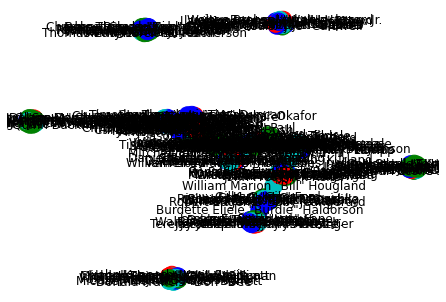

In [76]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_color=node_color, with_labels=True)
plt.show()